In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
BASEDIR = '/home/netorapg/projects/ML/aula--set-30-20250930T214721Z-1-001/aula--set-30/trabalhos'
RESULT = 'all.csv'

MYCOLS = ['dataset', 'classifier', 'metric', 
         'v1', 'v2', 'v3', 'v4', 
         'v5', 'v6', 'v7', 'v8', 
         'v9', 'v10', 'v11', 'v12', 
         'v13', 'v14', 'v15', 'v16', 
         'v17', 'v18', 'v19', 'v20', 
         'author']

# Dicionários de padronização
CLASSIFIER_MAPPING = {
    'perceptron': 'perceptron',
    'Perceptron': 'perceptron',
    ' perceptron': 'perceptron',
    'svm': 'svm',
    'SVM': 'svm',
    'SVC': 'svm',
    ' svm': 'svm',
    'bayes': 'naive_bayes',
    'NaiveBayes': 'naive_bayes',
    'Naive Bayes': 'naive_bayes',
    'GaussianNB': 'naive_bayes',
    ' bayes': 'naive_bayes',
    'trees': 'decision_tree',
    'DecisionTree': 'decision_tree',
    'Decision Tree': 'decision_tree',
    ' trees': 'decision_tree',
    'knn': 'knn',
    'KNN': 'knn',
    'KNeighbors': 'knn',
    ' knn': 'knn',
    'LogisticRegression': 'logistic_regression',
    'RandomForest': 'random_forest'
}

METRIC_MAPPING = {
    'f1': 'f1_score',
    'F1': 'f1_score',
    'f1-score': 'f1_score',
    'F1-Score': 'f1_score',
    'f1_score': 'f1_score',
    'F1_Score': 'f1_score',
    'F1-Measure': 'f1_score',
    ' f1': 'f1_score',
    'accuracy': 'accuracy',
    'Accuracy': 'accuracy',
    'Acurácia': 'accuracy',
    'Acuracia': 'accuracy',
    'acc': 'accuracy',
    'ACC': 'accuracy',
    'Acc': 'accuracy',
    ' acc': 'accuracy'
}

In [23]:

def standardize_data(df):
    """Padroniza os valores das colunas classifier e metric"""
    if 'classifier' in df.columns:
        df['classifier'] = df['classifier'].map(CLASSIFIER_MAPPING).fillna(df['classifier'])
    if 'metric' in df.columns:
        df['metric'] = df['metric'].map(METRIC_MAPPING).fillna(df['metric'])
    return df

mylist = os.listdir(BASEDIR)
result = []
errors = []

for fname in mylist:
    if not fname.endswith('.csv'):
        continue
    
    try:
        print(f"Processando: {fname}")
        filepath = os.path.join(BASEDIR, fname)
        df = pd.read_csv(filepath)
        
        # Validação do número de colunas
        if len(df.columns) != len(MYCOLS) - 1:  # -1 porque 'author' será adicionada
            print(f"AVISO: {fname} tem {len(df.columns)} colunas, esperado {len(MYCOLS)-1}")
        
        df['author'] = fname[:-4]
        
        # Ajusta colunas se necessário
        if len(df.columns) == len(MYCOLS):
            df.columns = MYCOLS
        
        # Padroniza dados
        df = standardize_data(df)
        result.append(df)
        
    except Exception as e:
        errors.append(f"Erro ao processar {fname}: {str(e)}")
        print(f"ERRO: {fname} - {str(e)}")

if result:
    final_result = pd.concat(result, axis=0, ignore_index=True)
    final_result.to_csv(RESULT, index=False)
    print(f"\nArquivo {RESULT} criado com sucesso!")
    print(f"Total de registros: {len(final_result)}")
    print(f"Arquivos processados: {len(result)}")
    
    if errors:
        print(f"\nErros encontrados: {len(errors)}")
        for error in errors:
            print(f"- {error}")
else:
    print("Nenhum arquivo foi processado com sucesso!")

Processando: leandro-menoni.csv
Processando: larissa-v2.csv
Processando: andrey--jodar.csv
Processando: pablo-v2.csv
Processando: arthur--heiji.csv
Processando: luiz-miguel-silva.csv
Processando: eduardo-barbeiro.csv
Processando: isaque--cruz.csv
Processando: romulo-jordao.csv
Processando: rafael-scarpelli.csv
Processando: mateus--raskoski.csv
Processando: rafael-leonardo.csv
Processando: vitor--garcia.csv
Processando: arthur-hydeki.csv
Processando: renato-augusto-v2.csv
Processando: eduardo-cavazin.csv
Processando: thalles--barros.csv
Processando: gregory--soares.csv
Processando: vitor-oliveira.csv
Processando: arthur-protazio.csv
Processando: lucas-v2.csv
Processando: gustavo--cruz-v2.csv
Processando: ana--beatriz.csv

Arquivo all.csv criado com sucesso!
Total de registros: 224
Arquivos processados: 23


In [24]:

# Primeiro, vamos carregar os dados processados
df_final = pd.read_csv(RESULT)

print("=== ANÁLISE DOS DADOS ===")
print(f"Total de registros: {len(df_final)}")
print(f"Classificadores únicos: {df_final['classifier'].unique()}")
print(f"Métricas únicas: {df_final['metric'].unique()}")
print()

=== ANÁLISE DOS DADOS ===
Total de registros: 224
Classificadores únicos: ['perceptron' 'svm' 'naive_bayes' 'decision_tree' 'knn'
 'logistic_regression' 'random_forest']
Métricas únicas: ['f1_score' 'accuracy']



In [25]:

# Filtrar apenas accuracy + decision_tree
filtered_data = df_final[
    (df_final['classifier'] == 'decision_tree') & 
    (df_final['metric'] == 'accuracy')
].copy()

print("=== DADOS FILTRADOS (Decision Tree + Accuracy) ===")
print(f"Registros encontrados: {len(filtered_data)}")
print(f"Datasets únicos: {filtered_data['dataset'].unique()}")
print(f"Autores únicos: {filtered_data['author'].unique()}")
print()


=== DADOS FILTRADOS (Decision Tree + Accuracy) ===
Registros encontrados: 23
Datasets únicos: ['tic-tac-toe' 'wine' 'glass_identification' 'iris' 'spambase' 'data.csv'
 'vertebra-column' 'garments-workers' 'car.csv' 'Rice'
 'breast-cancer-wisconsin.csv' 'bank' 'agaricus-lepiota' 'winequality-red'
 'Mushroom' 'Automobile' 'mushroom' 'accelerator-mobile' 'Car Evaluation'
 'insurance' 'wine-white']
Autores únicos: ['leandro-menoni' 'larissa-v2' 'andrey--jodar' 'pablo-v2' 'arthur--heiji'
 'luiz-miguel-silva' 'eduardo-barbeiro' 'isaque--cruz' 'romulo-jordao'
 'rafael-scarpelli' 'mateus--raskoski' 'rafael-leonardo' 'vitor--garcia'
 'arthur-hydeki' 'renato-augusto-v2' 'eduardo-cavazin' 'thalles--barros'
 'gregory--soares' 'vitor-oliveira' 'arthur-protazio' 'lucas-v2'
 'gustavo--cruz-v2' 'ana--beatriz']



In [26]:

# Verificar valores faltantes
value_columns = [f'v{i}' for i in range(1, 21)]
missing_data = []

for col in value_columns:
    missing_count = filtered_data[col].isna().sum()
    if missing_count > 0:
        missing_data.append((col, missing_count))

if missing_data:
    print("=== VALORES FALTANTES ENCONTRADOS ===")
    for col, count in missing_data:
        print(f"Coluna {col}: {count} valores faltantes")
        # Identificar autores com dados faltantes
        missing_authors = filtered_data[filtered_data[col].isna()]['author'].unique()
        print(f"  Autores afetados: {list(missing_authors)}")
    print("\n⚠️  AÇÃO NECESSÁRIA: Contactar os autores mencionados para completar os dados!")
else:
    print("✅ Nenhum valor faltante encontrado nos dados filtrados!")

print()


✅ Nenhum valor faltante encontrado nos dados filtrados!



/tmp/ipykernel_4804/3286105874.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=plot_labels)


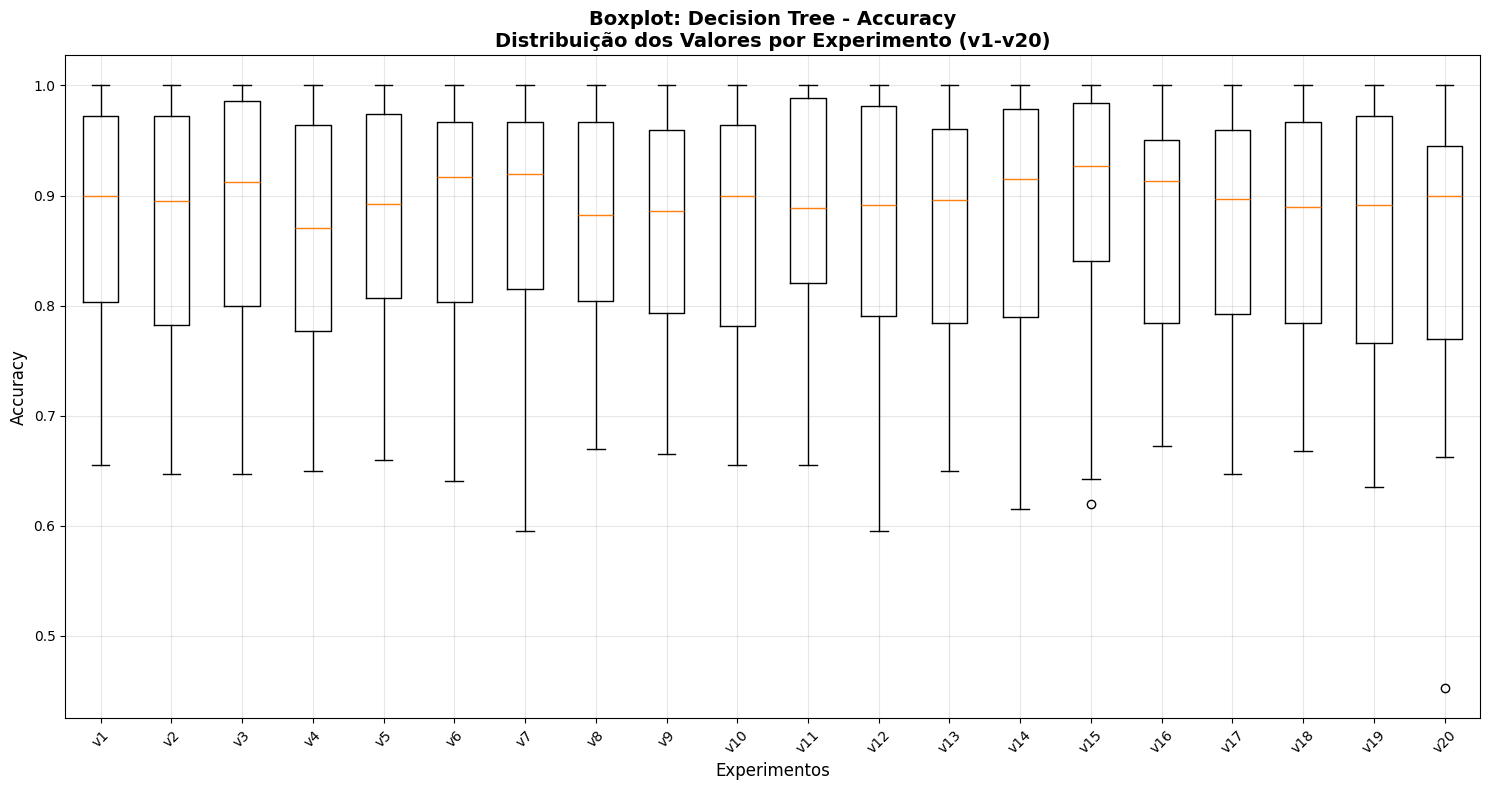

In [27]:

# Preparar dados para o boxplot (apenas valores válidos)
plot_data = []
plot_labels = []

for col in value_columns:
    valid_values = filtered_data[col].dropna()
    # Convert to numeric if dtype is object (e.g., for v15)
    if valid_values.dtype == 'O':
        valid_values = pd.to_numeric(valid_values, errors='coerce')
    if len(valid_values) > 0:
        plot_data.append(valid_values.values)
        plot_labels.append(col)

# Criar o boxplot
plt.figure(figsize=(15, 8))
plt.boxplot(plot_data, labels=plot_labels)
plt.title('Boxplot: Decision Tree - Accuracy\nDistribuição dos Valores por Experimento (v1-v20)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Experimentos', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== ESTATÍSTICAS DESCRITIVAS ===
v1: Média=0.8791, Mediana=0.9000, Std=0.1101, Min=0.6550, Max=1.0000
v2: Média=0.8717, Mediana=0.8949, Std=0.1110, Min=0.6475, Max=1.0000
v3: Média=0.8828, Mediana=0.9120, Std=0.1147, Min=0.6475, Max=1.0000
v4: Média=0.8631, Mediana=0.8710, Std=0.1129, Min=0.6500, Max=1.0000
v5: Média=0.8717, Mediana=0.8927, Std=0.1057, Min=0.6600, Max=1.0000
v6: Média=0.8755, Mediana=0.9167, Std=0.1153, Min=0.6407, Max=1.0000
v7: Média=0.8733, Mediana=0.9196, Std=0.1226, Min=0.5952, Max=1.0000
v8: Média=0.8744, Mediana=0.8827, Std=0.1066, Min=0.6700, Max=1.0000
v9: Média=0.8746, Mediana=0.8857, Std=0.1039, Min=0.6650, Max=1.0000
v10: Média=0.8688, Mediana=0.9000, Std=0.1130, Min=0.6550, Max=1.0000
v11: Média=0.8918, Mediana=0.8889, Std=0.0993, Min=0.6550, Max=1.0000
v12: Média=0.8652, Mediana=0.8916, Std=0.1283, Min=0.5952, Max=1.0000
v13: Média=0.8687, Mediana=0.8960, Std=0.1106, Min=0.6500, Max=1.0000
v14: Média=0.8735, Mediana=0.9152, Std=0.1245, Min=0.6150, Max=1.0

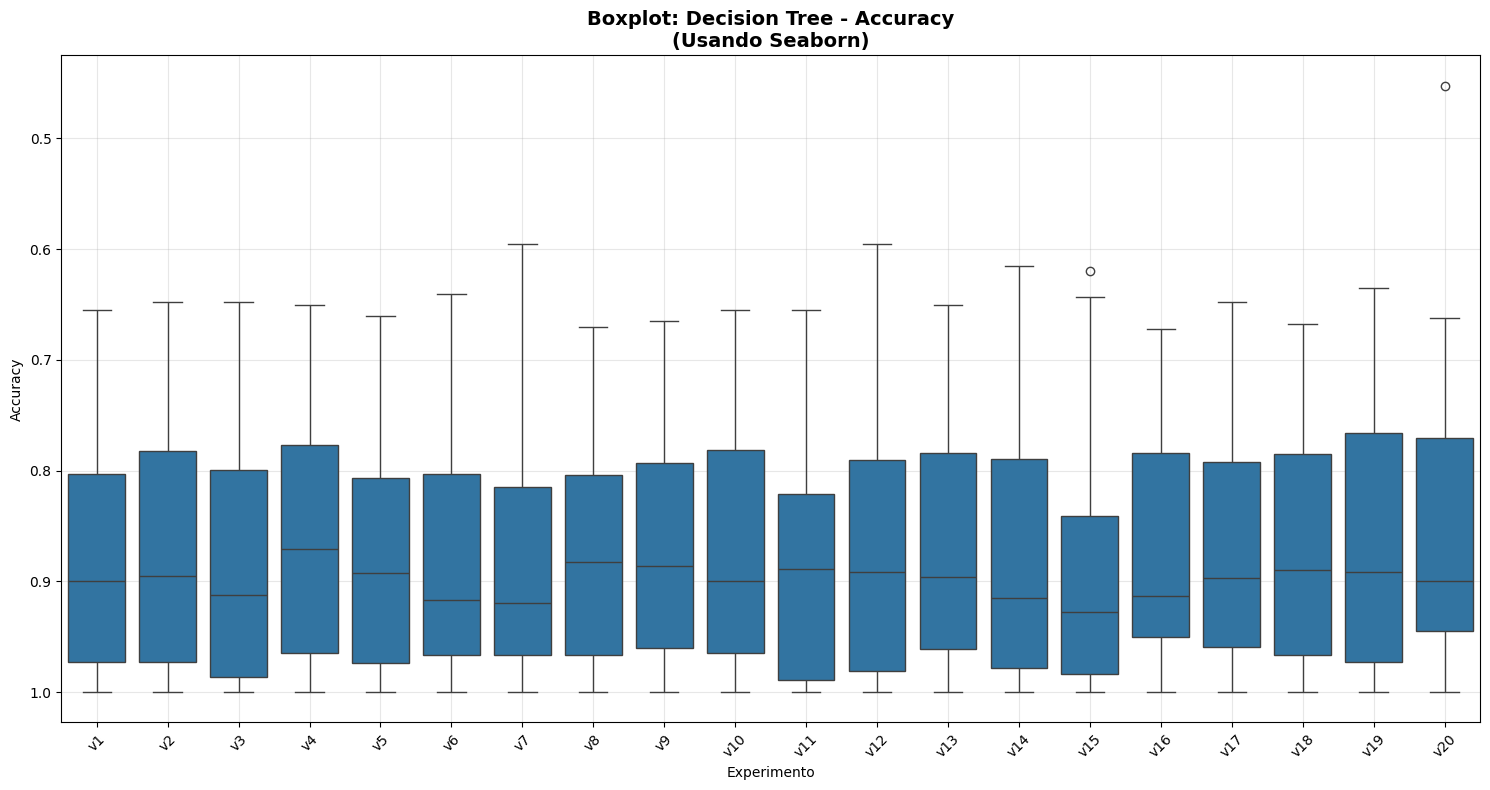


=== RESUMO FINAL ===
Classificador analisado: Decision Tree
Métrica analisada: Accuracy
Total de experimentos com dados: 20
Total de valores analisados: 460
✅ Todos os dados estão completos!


In [28]:

# Estatísticas descritivas
print("=== ESTATÍSTICAS DESCRITIVAS ===")
for i, col in enumerate(value_columns):
    valid_values = filtered_data[col].dropna()
    # Convert to numeric if dtype is object
    if valid_values.dtype == 'O':
        valid_values = pd.to_numeric(valid_values, errors='coerce')
    if len(valid_values) > 0:
        print(f"{col}: Média={valid_values.mean():.4f}, "
              f"Mediana={valid_values.median():.4f}, "
              f"Std={valid_values.std():.4f}, "
              f"Min={valid_values.min():.4f}, "
              f"Max={valid_values.max():.4f}")

# Boxplot alternativo usando seaborn (mais bonito)
plt.figure(figsize=(15, 8))

# Converter dados para formato long para seaborn
long_data = []
for col in value_columns:
    valid_values = filtered_data[col].dropna()
    for val in valid_values:
        long_data.append({'Experimento': col, 'Accuracy': val})

long_df = pd.DataFrame(long_data)

if len(long_df) > 0:
    sns.boxplot(data=long_df, x='Experimento', y='Accuracy')
    plt.title('Boxplot: Decision Tree - Accuracy\n(Usando Seaborn)', 
              fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Mostrar resumo final
    print(f"\n=== RESUMO FINAL ===")
    print(f"Classificador analisado: Decision Tree")
    print(f"Métrica analisada: Accuracy")
    print(f"Total de experimentos com dados: {len(plot_labels)}")
    print(f"Total de valores analisados: {len(long_df)}")
    
    if missing_data:
        print(f"⚠️  Atenção: {len(missing_data)} colunas têm valores faltantes")
    else:
        print("✅ Todos os dados estão completos!")
else:
    print("❌ Nenhum dado válido encontrado para Decision Tree + Accuracy")
    

/tmp/ipykernel_4804/3424846446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=long_df, x='Experimento', y='Accuracy', palette='viridis')


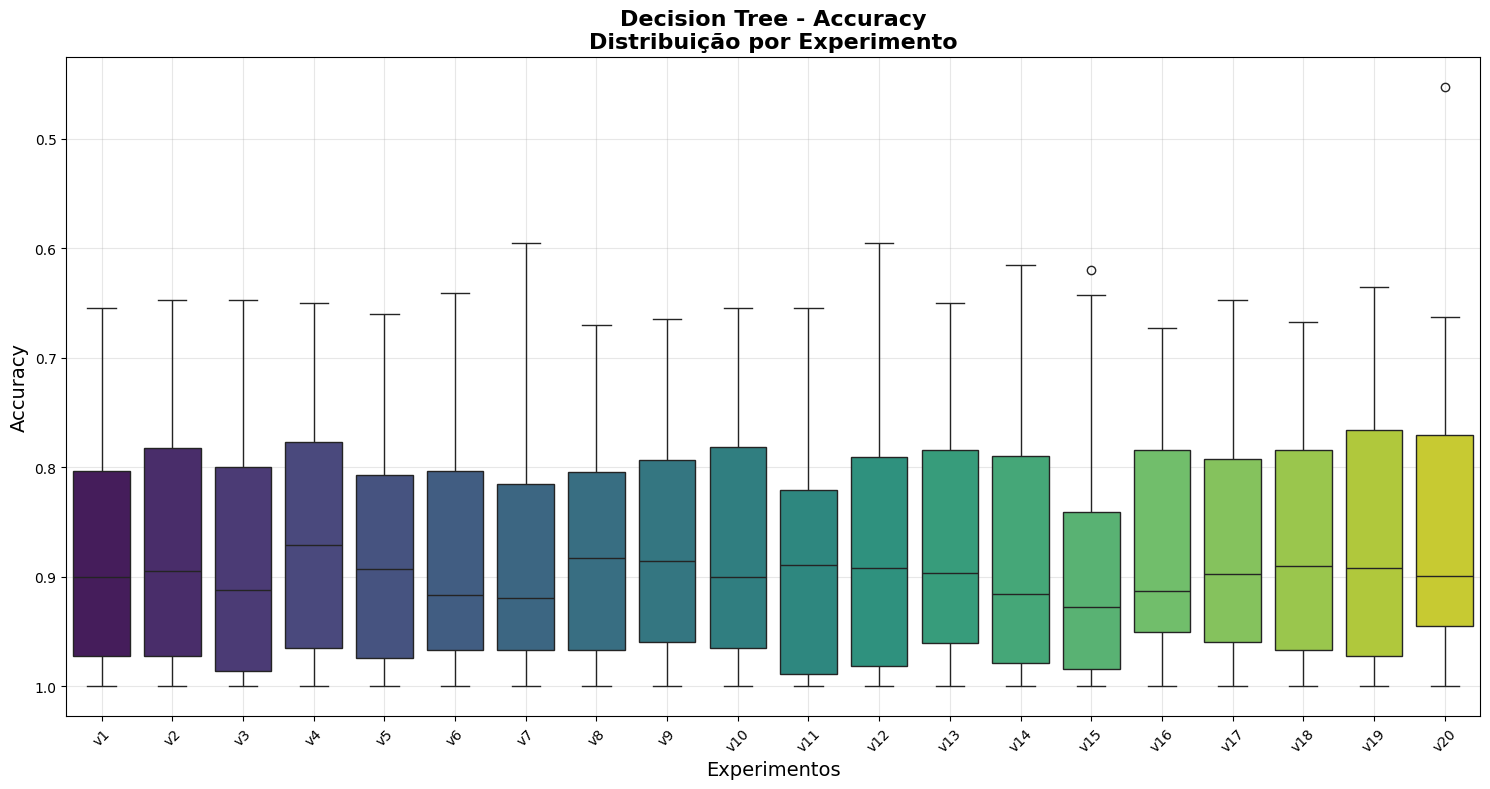

📊 Gráfico salvo como 'decision_tree_accuracy_boxplot.png'


In [29]:
# Nova célula opcional - Salvar gráfico
plt.figure(figsize=(15, 8))
sns.boxplot(data=long_df, x='Experimento', y='Accuracy', palette='viridis')
plt.title('Decision Tree - Accuracy\nDistribuição por Experimento', 
          fontsize=16, fontweight='bold')
plt.xlabel('Experimentos', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('decision_tree_accuracy_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Gráfico salvo como 'decision_tree_accuracy_boxplot.png'")


=== DATASETS DISPONÍVEIS ===
Datasets únicos: ['Automobile', 'Car Evaluation', 'Mushroom', 'Rice', 'accelerator-mobile', 'agaricus-lepiota', 'bank', 'breast-cancer-wisconsin.csv', 'car.csv', 'data.csv', 'garments-workers', 'glass_identification', 'insurance', 'iris', 'mushroom', 'spambase', 'tic-tac-toe', 'vertebra-column', 'wine', 'wine-white', 'winequality-red']

Total de valores coletados: 460
Datasets com dados: ['Automobile' 'Car Evaluation' 'Mushroom' 'Rice' 'accelerator-mobile'
 'agaricus-lepiota' 'bank' 'breast-cancer-wisconsin.csv' 'car.csv'
 'data.csv' 'garments-workers' 'glass_identification' 'insurance' 'iris'
 'mushroom' 'spambase' 'tic-tac-toe' 'vertebra-column' 'wine' 'wine-white'
 'winequality-red']



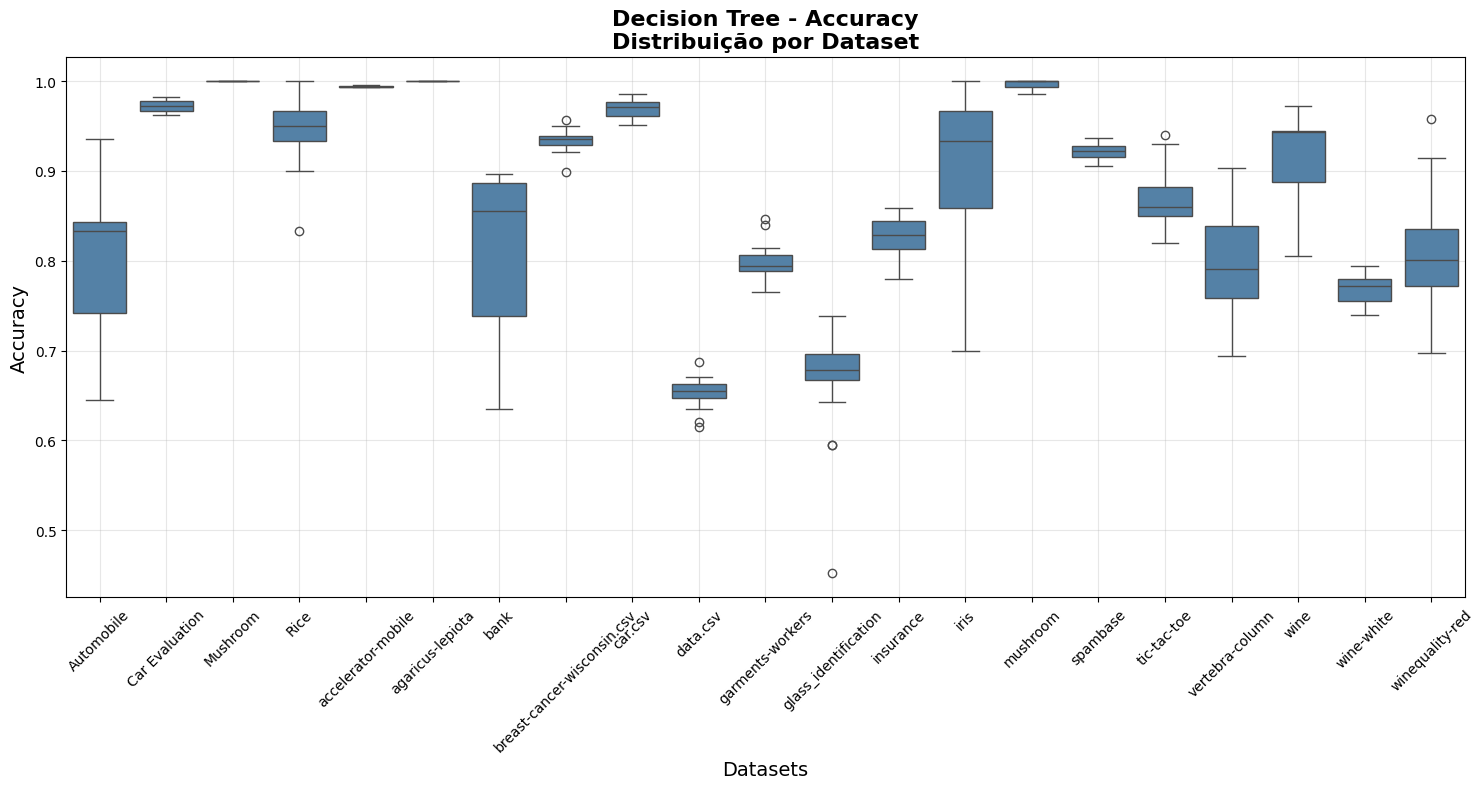

=== ESTATÍSTICAS POR DATASET ===
Automobile: 
  Média=0.7991, Mediana=0.8336, Std=0.0773, Min=0.6452, Max=0.9355, N=20

Car Evaluation: 
  Média=0.9725, Mediana=0.9725, Std=0.0080, Min=0.9624, Max=0.9827, N=20

Mushroom: 
  Média=1.0000, Mediana=1.0000, Std=0.0000, Min=1.0000, Max=1.0000, N=20

Rice: 
  Média=0.9500, Mediana=0.9500, Std=0.0397, Min=0.8333, Max=1.0000, N=20

accelerator-mobile: 
  Média=0.9944, Mediana=0.9940, Std=0.0009, Min=0.9930, Max=0.9960, N=20

agaricus-lepiota: 
  Média=1.0000, Mediana=1.0000, Std=0.0000, Min=1.0000, Max=1.0000, N=20

bank: 
  Média=0.8069, Mediana=0.8553, Std=0.0914, Min=0.6348, Max=0.8971, N=40

breast-cancer-wisconsin.csv: 
  Média=0.9349, Mediana=0.9357, Std=0.0128, Min=0.8993, Max=0.9571, N=20

car.csv: 
  Média=0.9689, Mediana=0.9710, Std=0.0100, Min=0.9509, Max=0.9855, N=20

data.csv: 
  Média=0.6529, Mediana=0.6550, Std=0.0166, Min=0.6150, Max=0.6875, N=20

garments-workers: 
  Média=0.7982, Mediana=0.7941, Std=0.0194, Min=0.7647, Max=0.

In [30]:
# Nova célula - Análise correta por DATASET

# Primeiro, vamos ver quais datasets temos
print("=== DATASETS DISPONÍVEIS ===")
print(f"Datasets únicos: {sorted(filtered_data['dataset'].unique())}")
print()

# Preparar dados agrupados por DATASET (não por experimento)
dataset_data = []

# Para cada dataset, coletar TODOS os valores v1-v20 de TODOS os alunos
for dataset_name in sorted(filtered_data['dataset'].unique()):
    dataset_rows = filtered_data[filtered_data['dataset'] == dataset_name]
    
    # Coletar todos os valores v1-v20 deste dataset
    all_values = []
    for _, row in dataset_rows.iterrows():
        for col in value_columns:
            value = row[col]
            if pd.notna(value):
                # Convert to numeric if needed
                if isinstance(value, str):
                    try:
                        value = float(value)
                    except:
                        continue
                all_values.append(value)
    
    # Adicionar ao dataset final
    for val in all_values:
        dataset_data.append({'Dataset': dataset_name, 'Accuracy': val})

# Converter para DataFrame
dataset_df = pd.DataFrame(dataset_data)

print(f"Total de valores coletados: {len(dataset_df)}")
print(f"Datasets com dados: {dataset_df['Dataset'].unique()}")
print()

# Criar boxplot por DATASET
plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset_df, x='Dataset', y='Accuracy', color='steelblue')
plt.title('Decision Tree - Accuracy\nDistribuição por Dataset', 
          fontsize=16, fontweight='bold')
plt.xlabel('Datasets', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estatísticas por dataset
print("=== ESTATÍSTICAS POR DATASET ===")
for dataset_name in sorted(dataset_df['Dataset'].unique()):
    dataset_values = dataset_df[dataset_df['Dataset'] == dataset_name]['Accuracy']
    print(f"{dataset_name}: ")
    print(f"  Média={dataset_values.mean():.4f}, "
          f"Mediana={dataset_values.median():.4f}, "
          f"Std={dataset_values.std():.4f}, "
          f"Min={dataset_values.min():.4f}, "
          f"Max={dataset_values.max():.4f}, "
          f"N={len(dataset_values)}")
    print()